## 타이타닉 생존자 예측하기
### 1. 데이터 읽고 전체적인 상황 확인하기

In [2]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
raw_data = pd.read_excel('../../../DataScience/data/python_data/titanic.xls')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


#### 변수 설명
* pclass : 1, 2, 3등석
* survived : 생존 여부. survived(생존-1), dead(사망-0)
* name : 이름
* sex :
* 성별 : female(여성), male(남성)
* age : 나이
* sibsp : 함께 탑승한 형제 또는 배우자의 수
* parch : 함께 탑승한 부모 또는 자녀의 수
* ticket : 티켓 번호
* fare : 티켓 요금
* cabin : 선실 번호
* embarked :탑승한 곳. C(Cherbourg), Q(Queenstown), S(Southampton)
* boat : 탈출한 보트가 있다면 boat 번호

In [5]:
raw_data.describe()
#  1309 entries

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


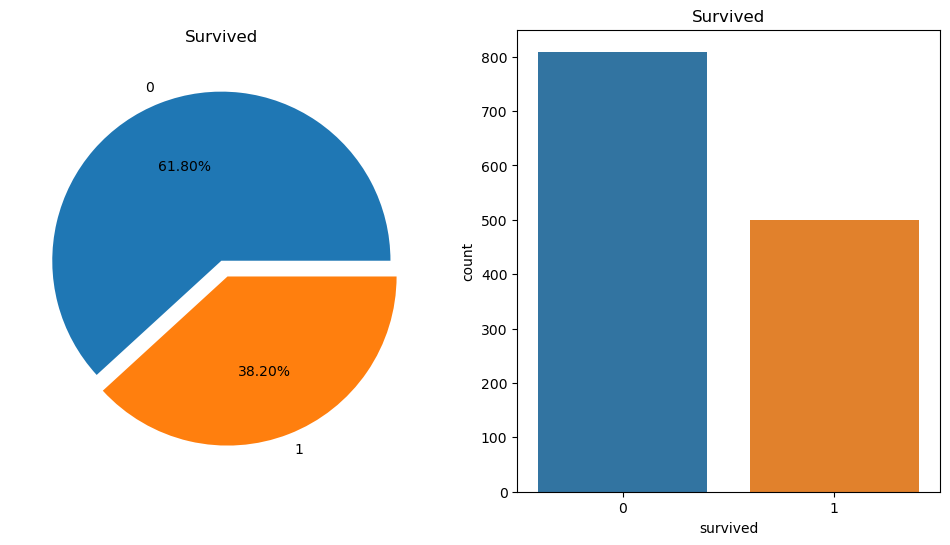

In [7]:
f, ax = plt.subplots(1,2, figsize = (12,6))
raw_data['survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.2f%%', ax = ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(data = raw_data, x = 'survived', ax = ax[1])
ax[1].set_title('Survived')
plt.show()
# 생존률 : 38.2%, 대략 500명

<Axes: >

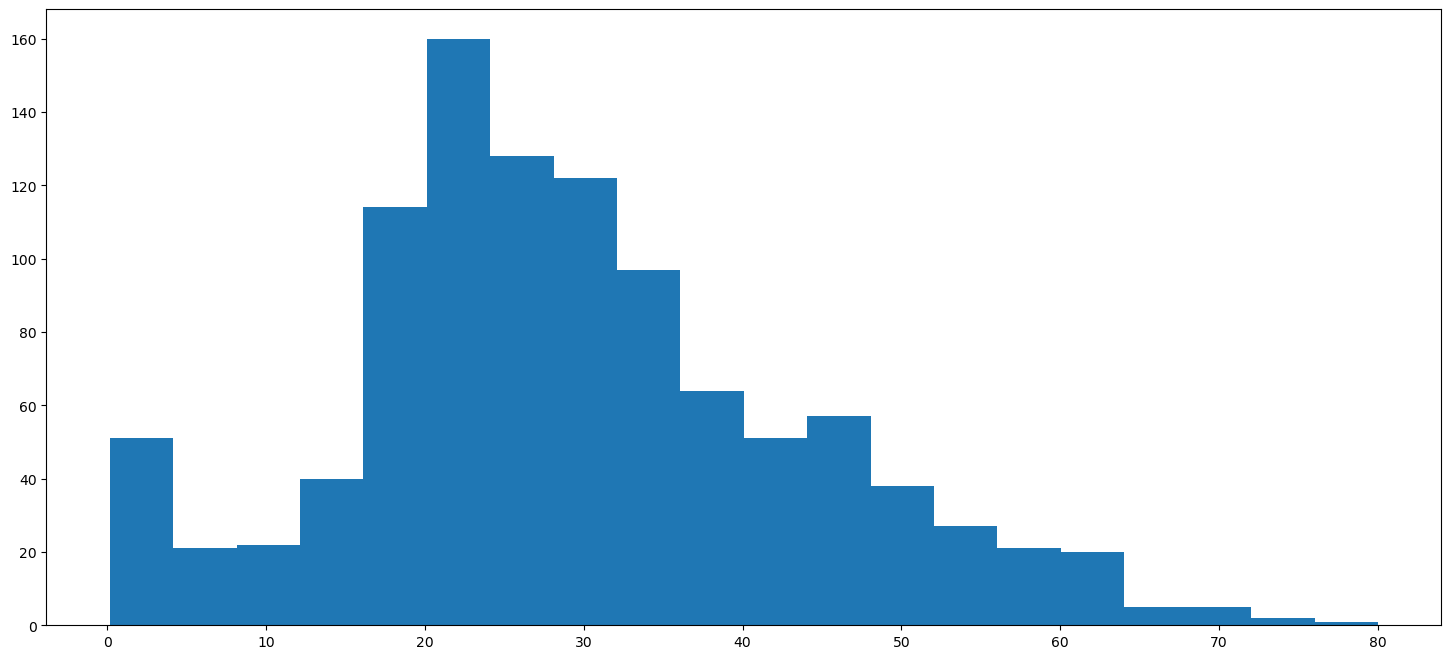

In [8]:
# 0~4세 아기들이 많음
raw_data['age'].hist(bins = 20, figsize = (18,8), grid = False)

In [9]:
# 1등석 : 생존률이 가장 높다, 나이도 많다, 요금 차이가 많이 남.
raw_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [10]:
raw_data.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


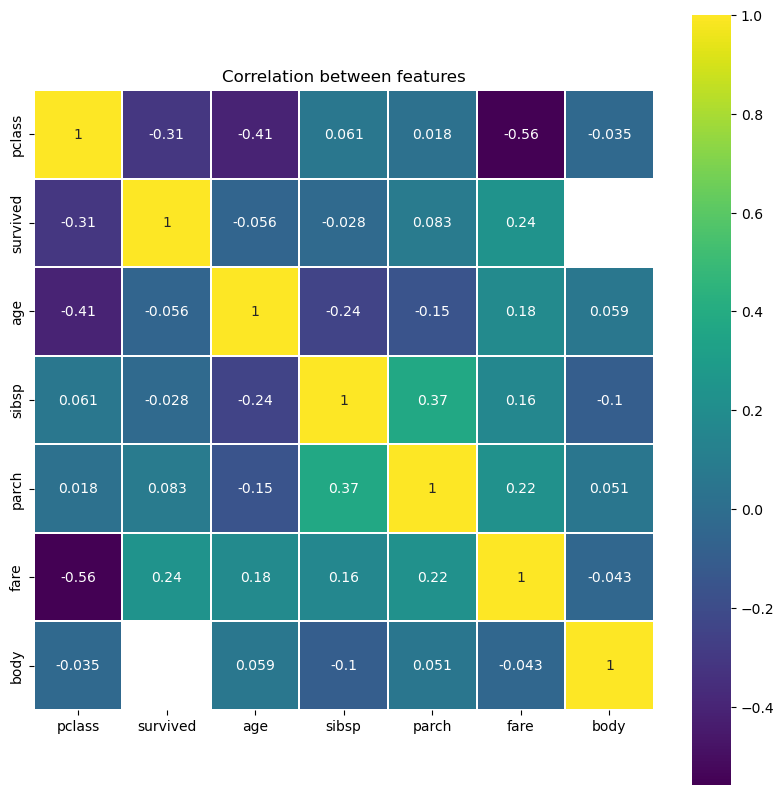

In [11]:
# 상관계수는 두 데이터의 상관관계만 확인, 인과 관계로 생각하면 안된다
plt.figure(figsize=(10,10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True, annot=True, cmap=plt.cm.viridis, linecolor='white')
plt.title('Correlation between features')
plt.show()

### 나이 구간별 및 성별 생존률 확인하기

In [12]:
raw_data['age_cat'] = pd.cut(raw_data['age'], bins = [0,3,7,15,30,60,100],
                             include_lowest = True,
                             labels = ['baby', 'children', 'teenage', 'young', 'adult', 'old'])

raw_data.head(20)
raw_data.to_excel(excel_writer='../data/titanic_age.xlsx')

In [13]:
# 나이가 적을 수록 2,3등실에 머문 수가 많다
raw_data.groupby('age_cat').mean()

,pclass,survived,age,sibsp,parch,fare,body
age_cat,,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346,4.000000
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828,NaN
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904,132.000000
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140,169.720930
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986,154.777778
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309,185.600000


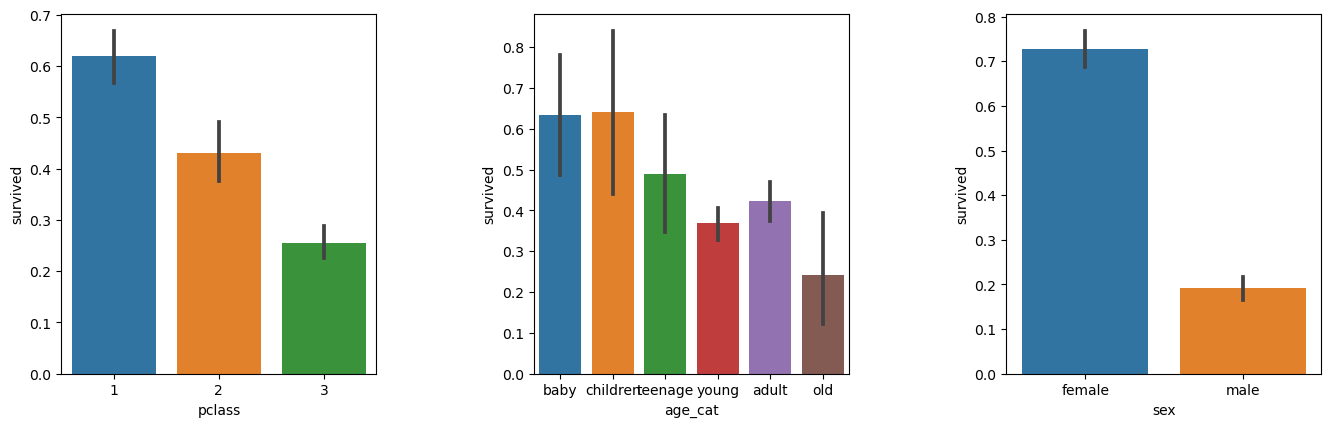

In [14]:
plt.figure(figsize=(14,4))
plt.subplot(131)
sns.barplot(data = raw_data, x = 'pclass', y = 'survived')

plt.subplot(132)
sns.barplot(data = raw_data, x = 'age_cat', y = 'survived')

plt.subplot(133)
sns.barplot(data = raw_data, x = 'sex', y = 'survived')

plt.subplots_adjust(top = 1, bottom = 0.1, left = 0.1, right = 1, hspace = 0.5, wspace = 0.5)
plt.show()

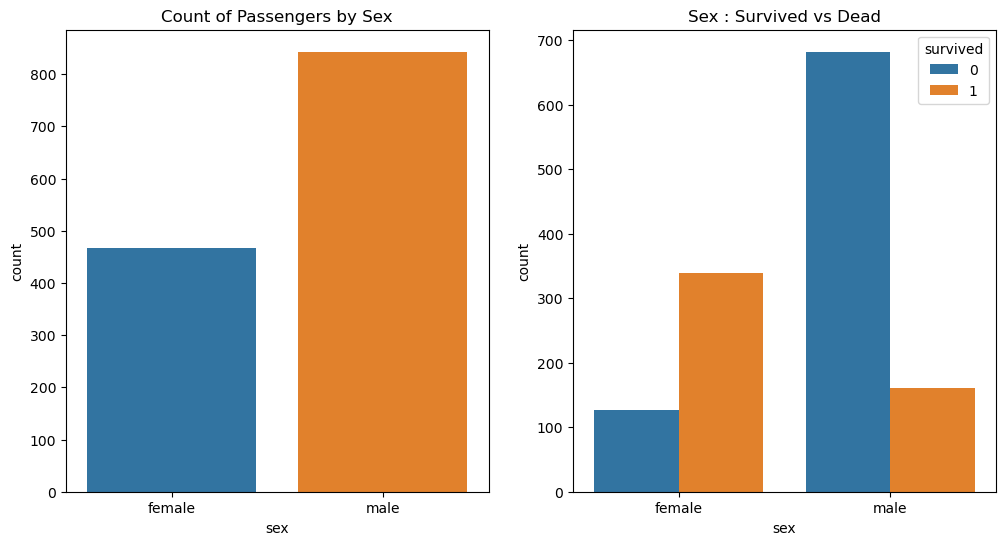

In [15]:
# 성별로 탑승 인원 확인
# 대략, 여성 (450명) 중 350명 생존, 남성 (850명) 중 170명 생존
f, ax = plt.subplots(1,2,figsize = (12,6))
sns.countplot(data = raw_data, x = 'sex', ax = ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot(data = raw_data, x = 'sex', hue = 'survived', ax = ax[1])
ax[1].set_title('Sex : Survived vs Dead')

plt.show()

### 보트 탑승 승객의 생존률

In [16]:
boat_survivors = raw_data[raw_data['boat'].notnull()]
boat_survivors.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult


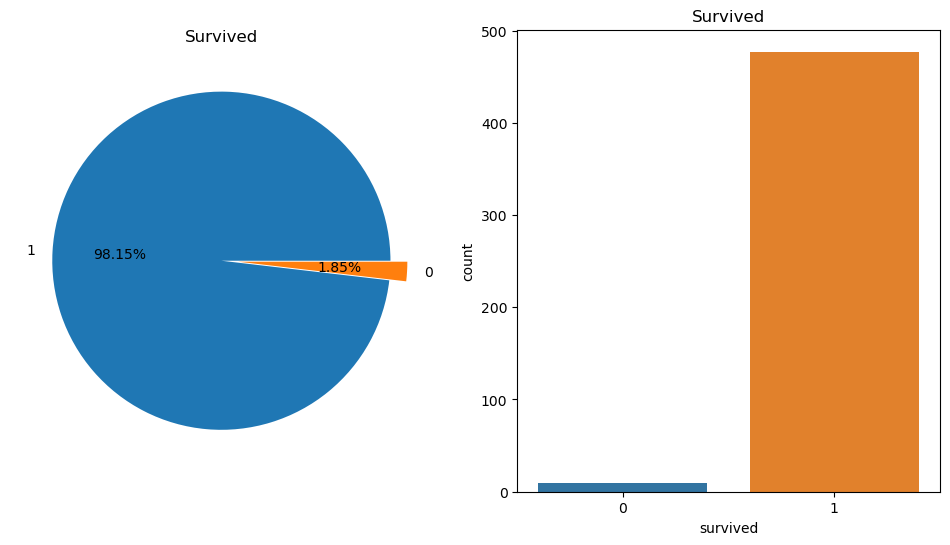

In [17]:
f, ax = plt.subplots(1,2,figsize = (12,6))

boat_survivors['survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.2f%%', ax = ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(data = boat_survivors, x = 'survived', ax = ax[1])
ax[1].set_title('Survived')
plt.show()

학습하기 위해 데이터를 정리하고 특징을 선택

In [18]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


In [19]:
tmp = []
for each in raw_data['sex']:
    if each == 'female':
        tmp.append(0)
    elif each == 'male':
        tmp.append(1)
    else:
        tmp.append(np.nan)

In [20]:
raw_data['sex'] = tmp
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


In [21]:
# 정보가 없는 NaN을 빼고 다시 저장 - 데이터가 263개가 줄어든다
raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   int64   
 1   survived   1045 non-null   int64   
 2   name       1045 non-null   object  
 3   sex        1045 non-null   int64   
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   int64   
 6   parch      1045 non-null   int64   
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
dtypes: category(1), float64(3), int64(5), object(6)
memory usage: 123.7+ KB


생존자 예측을 위한 모델 수립

In [22]:
train_pre = raw_data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
train_pre.head()

,pclass,sex,age,sibsp,parch,fare
0,1,0,29.0000,0,0,211.3375
1,1,1,0.9167,1,2,151.5500
2,1,0,2.0000,1,2,151.5500
3,1,1,30.0000,1,2,151.5500
4,1,0,25.0000,1,2,151.5500


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_pre, raw_data[['survived']], test_size = 0.1, random_state = 13)

In [24]:
print(X_train.shape, X_test.shape)

(940, 6) (105, 6)


In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  940 non-null    int64  
 1   sex     940 non-null    int64  
 2   age     940 non-null    float64
 3   sibsp   940 non-null    int64  
 4   parch   940 non-null    int64  
 5   fare    940 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 51.4 KB


In [26]:
X_train = X_train.reset_index()
X_train = X_train.drop(['index'], axis = 1)

X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis = 1)

y_train = y_train.reset_index()
y_train = y_train.drop(['index'], axis = 1)

y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis = 1)

In [27]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare
0,3,0,37.0,0,0,7.7500
1,2,1,34.0,0,0,13.0000
2,3,0,38.0,1,5,31.3875
3,2,1,31.0,0,0,13.0000
4,1,0,63.0,1,0,221.7792


In [28]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=13)
tree_clf.fit(X_train, y_train)

print('Score : {}'.format(tree_clf.score(X_train, y_train)))

Score : 0.8117021276595745


In [29]:
from sklearn.metrics import accuracy_score
y_pred = tree_clf.predict(X_test)
print("Test Accuracy is", accuracy_score(y_test, y_pred)*100)

Test Accuracy is 84.76190476190476


디카프리오 생존 예측

In [30]:
# pcalss, sex, age, sibsp, parch, fare
dicaprio = [3,1,19,0,0,5]
winslet = [1,0,17,1,1,100]

In [31]:
# predict_proba 확률 : 전체 1 (=0.02419355 + 0.97580645)
tree_clf.predict_proba([winslet])

array([[0.02419355, 0.97580645]])

In [32]:
tree_clf.predict_proba([dicaprio])

array([[0.875, 0.125]])

In [33]:
heewon = [2,0,26,1,1,50]
tree_clf.predict_proba([heewon])

array([[0.02419355, 0.97580645]])

다른 모델 사용해보기

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('Score (knn) : {}'.format(knn.score(X_train, y_train)))

rf = RandomForestClassifier(n_estimators=13)
rf.fit(X_train, y_train)
print('Score (rf) : {}'.format(rf.score(X_train, y_train)))

Score (knn) : 0.7265957446808511
Score (rf) : 0.9691489361702128


In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

K_fold = KFold(n_splits=10, shuffle=True, random_state=0)

K_tree = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(K_tree, X_train, y_train, cv = K_fold, n_jobs=1, scoring=scoring)

print(score)

[0.68085106 0.75531915 0.82978723 0.68085106 0.75531915 0.69148936
 0.73404255 0.76595745 0.71276596 0.77659574]


In [36]:
round(np.mean(score)*100, 2)

73.83